## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')
%matplotlib inline
import plotly.express as px
from joypy import joyplot
from matplotlib import cm

## Load Dataset

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this kernel, we will focus on the Canadian Immigration data.

In [3]:
df = pd.read_excel("Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

## Data Preprocessing

In [4]:
# remove unwanted columns
df.drop(['AREA', 'REG', 'DEV', 'Coverage'], axis=1, inplace=True)

# rename columns
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# make all columns str to be consistent
df.columns = list(map(str, df.columns))

# set the country as the index
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# list of years to be used for plotting
years = list(map(str, range(1980, 2014)))

# replace '..' with ''
df.replace('..', '0', inplace=True)
print('data dimensions:', df.shape)

data dimensions: (194, 40)


C:\Users\Harle\AppData\Local\Temp/ipykernel_29524/3568381911.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


In [5]:
df.head()

,Type,Continent,iso_alpha,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,AFG,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Europe,ALB,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Africa,DZA,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Oceania,ASM,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Europe,AND,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


## Pie Chart

Proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [6]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

print(type(df.groupby('Continent', axis=0)))

df_continents

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3879,4249,3717,2627,2607,2621,3739,7426,7453,9707,...,26908,28734,27621,29279,34026,40398,35007,37646,38136,610350
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


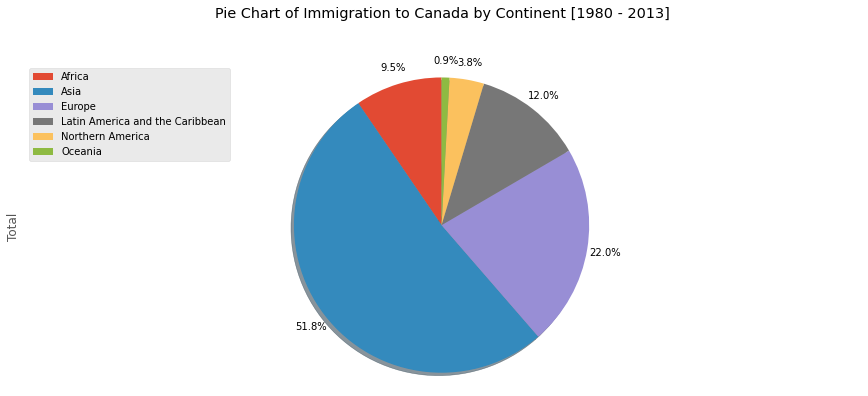

In [7]:
# colors_list = ['gold', 'pink', 'yellowgreen', 'lightskyblue', 'lightgreen', 'lightcoral']
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            # colors=colors_list,  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('Pie Chart of Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

- Over half of the worlds immigrants are from Asia, followed by Europe and then Latin America and the Caribbean.
- Lowest number of immigrants are from Oceania and Northern America.

## Bar Plot

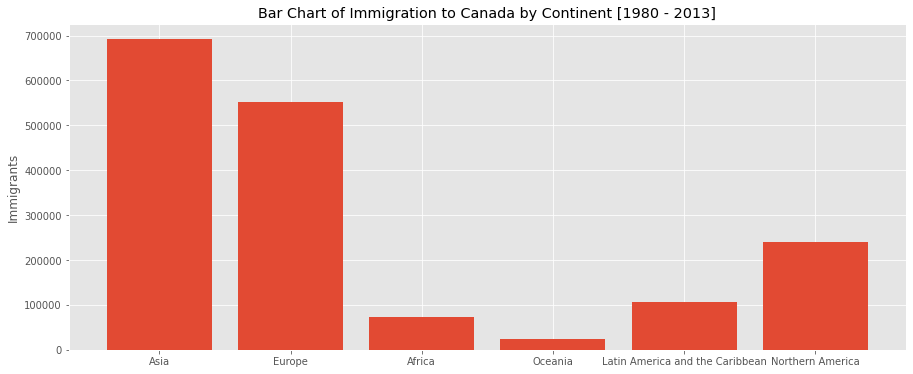

In [8]:
plt.figure(figsize=(15,6))
plt.bar(df['Continent'], df['Total'])
plt.ylabel("Immigrants")
plt.title("Bar Chart of Immigration to Canada by Continent [1980 - 2013]")
plt.show()

## Box Plot

Plot the distribution of Indian immigrants between 1980 - 2013.

Box plot illustrates the summary statistics.

In [9]:
df_india = df.loc[['India'], years].transpose()
df_india.head(3)
# df_india.columns

Country,India
1980,8880
1981,8670
1982,8147


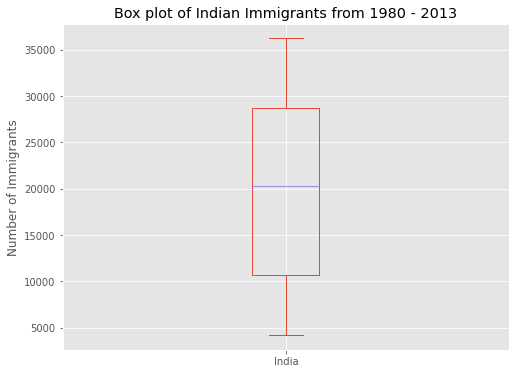

In [10]:
df_india.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Indian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can take the following observations from the plot above:

- Minimum number of immigrants is around 4000, maximum number is around 36000, and the median is around 20500.
- 25% of the years for period 1980 - 2013 had an annual immigrant count of ~10000 (first quartile)
- 75% of the years for period 1980 - 2013 had an annual immigrant count of ~10000 (first quartile)

We can view the numbers using the `describe()` method.

In [11]:
df_india.describe()

Country,India
count,34.000000
mean,20350.117647
std,10007.342579
min,4211.000000
25%,10637.750000
50%,20235.000000
75%,28699.500000
max,36210.000000


## Violin / Histogram / Density Plots 

Here we explore different visualisations to explore the distribution of data.

Violin plot - hybrid - similar to histogram with the probability density on either side which is smoothed with a kernel density estimator.

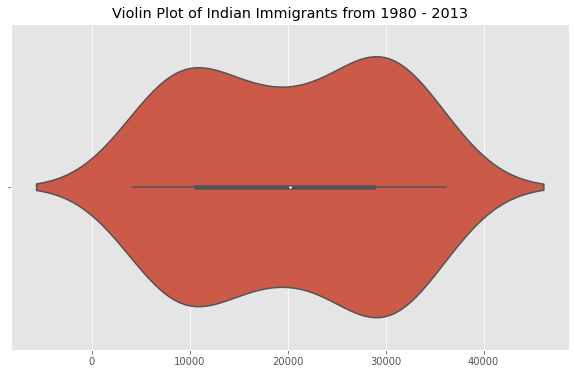

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df_india['India'])
plt.xlabel("")
plt.title("Violin Plot of Indian Immigrants from 1980 - 2013")

plt.show()

Histogram groups data points into bins of a series of intervals.

- The distribution of Indian immigrants is skewed to the left - almost following a bimodal distribution experiecing two peaks.

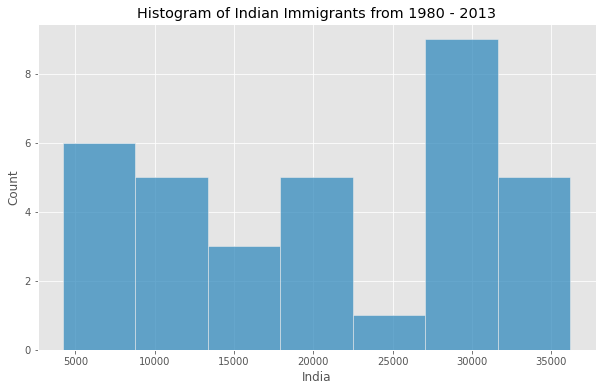

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_india['India'])
plt.title("Histogram of Indian Immigrants from 1980 - 2013")
plt.show()

Density curve - similar to histogram shows the shape of the distribution - it is easier to see the two peaks of the distribution and we can confirm a bimodal distribution by looking at the density curve.

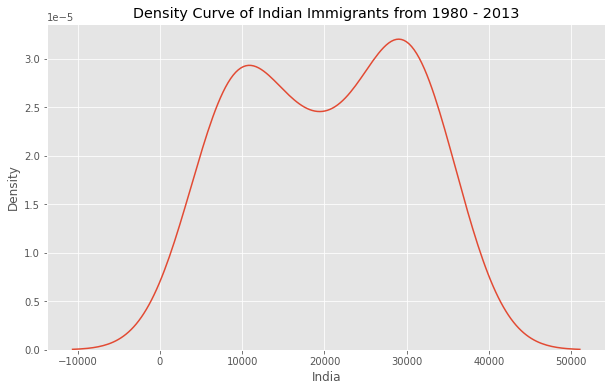

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df_india['India'])
plt.title("Density Curve of Indian Immigrants from 1980 - 2013")
plt.show()

### Density Curves of Immigrants by Continent

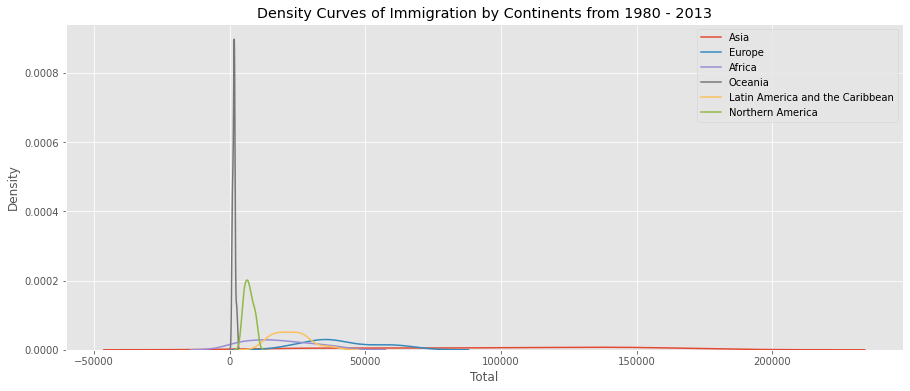

In [15]:
plt.figure(figsize=(15,6))

for continent in df['Continent'].unique():
    df_continent = df.loc[df['Continent'] == continent, years].transpose()
    df_continent['Total'] = df_continent.sum(axis=1)
    sns.kdeplot(x=df_continent['Total'], label=continent)
plt.title("Density Curves of Immigration by Continents from 1980 - 2013")
plt.legend()

Difficult to interpret given how the distribution of continents vary.

## Ridgeline Plot

We apply a ridgeline plot of continents for the number of immigrants to visualise the density.

<Figure size 432x288 with 0 Axes>

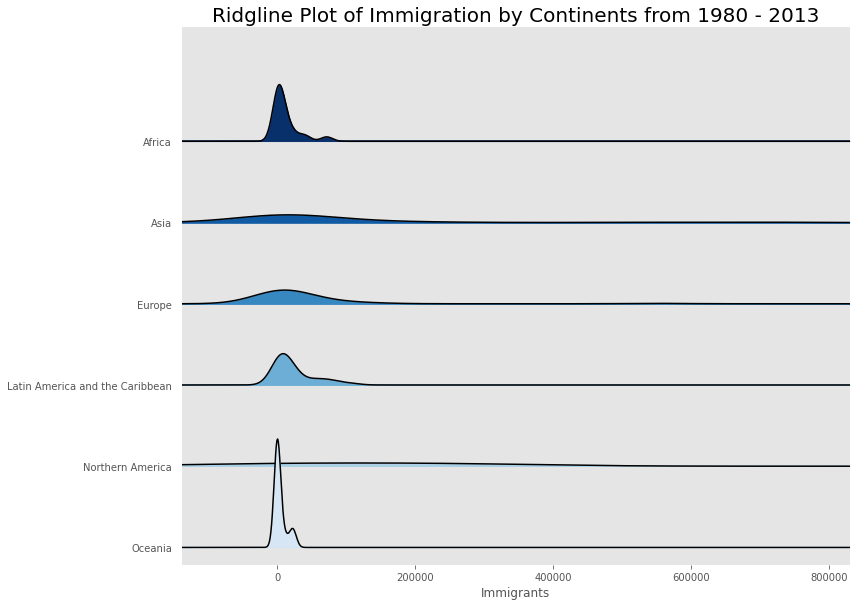

In [41]:
plt.figure()
joyplot(
    data=df[['Total', 'Continent']], 
    by='Continent',
    figsize=(12, 8),
    # alpha=0.85,
    colormap=cm.Blues_r
)
plt.title('Ridgline Plot of Immigration by Continents from 1980 - 2013', fontsize=20)
plt.xlabel("Immigrants")
plt.show()

### Violin Plot of Immigration by Continents

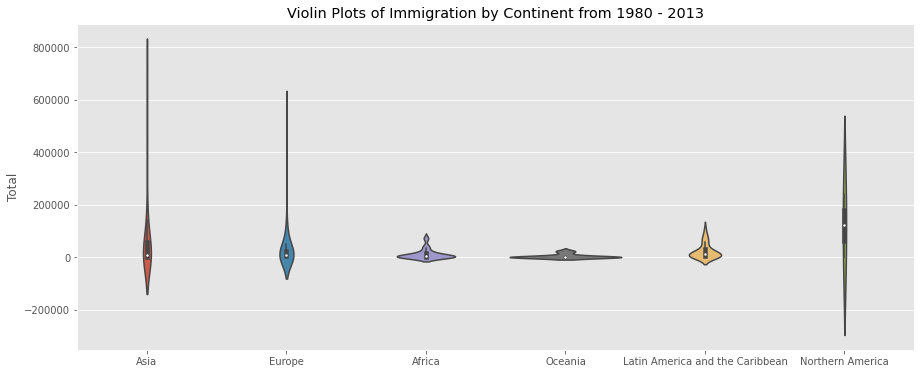

In [17]:
plt.figure(figsize=(15,6))
sns.violinplot(x="Continent", y="Total", data=df)
plt.xlabel("")
plt.title("Violin Plots of Immigration by Continent from 1980 - 2013")

plt.show()

# df_continents.iloc[:,0]

### Normalization / Standardization

In [45]:
# normalise numeric values with minmax scaling
df_numeric = df.iloc[:,5:]
df_cat = df.iloc[:,:5]
df_numeric_norm = (df_numeric-df_numeric.min())/ (df_numeric.max() - df_numeric.min())

df_norm = df_cat.join(df_numeric_norm)
df_norm.head()

,Type,Continent,iso_alpha,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,AFG,Southern Asia,Developing regions,0.000726,0.001573,0.001891,0.004693,0.006981,...,0.080688,0.088897,0.092269,0.070280,0.058943,0.045524,0.059921,0.076789,0.058718,0.084749
Albania,Immigrants,Europe,ALB,Southern Europe,Developed regions,0.000045,0.000000,0.000000,0.000000,0.000000,...,0.028720,0.025290,0.024424,0.018644,0.024171,0.014527,0.014661,0.018068,0.017668,0.022688
Algeria,Immigrants,Africa,DZA,Northern Africa,Developing regions,0.003629,0.002702,0.003443,0.006890,0.006195,...,0.085149,0.142017,0.126052,0.133336,0.182061,0.123055,0.117639,0.109981,0.126901,0.100358
American Samoa,Immigrants,Oceania,ASM,Polynesia,Developing regions,0.000000,0.000040,0.000000,0.000000,0.000000,...,0.000000,0.000030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007
Andorra,Immigrants,Europe,AND,Southern Europe,Developed regions,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000030,0.000035,0.000000,0.000000,0.000000,0.000000,0.000029,0.000029,0.000020


In [55]:
# standardising numeric values with minmax scaling
df_numeric = df.iloc[:,5:]
df_cat = df.iloc[:,:5]
df_numeric_standard = (df_numeric - df_numeric.mean()) / df_numeric.std()

df_standard = df_cat.join(df_numeric_standard)
df_standard.head()

,Type,Continent,iso_alpha,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,AFG,Southern Asia,Developing regions,-0.253095,-0.245752,-0.266062,-0.283472,-0.255829,...,0.476001,0.441478,0.422176,0.232550,0.121462,0.074416,0.231728,0.309182,0.159728,0.278747
Albania,Immigrants,Europe,ALB,Southern Europe,Developed regions,-0.260770,-0.263825,-0.286900,-0.322405,-0.314942,...,-0.022746,-0.105463,-0.142674,-0.186204,-0.146827,-0.193130,-0.180146,-0.164036,-0.170043,-0.187960
Algeria,Immigrants,Africa,DZA,Northern Africa,Developing regions,-0.220348,-0.232777,-0.248964,-0.265248,-0.262489,...,0.518822,0.898236,0.703443,0.743910,1.071414,0.743617,0.756966,0.576674,0.707463,0.396130
American Samoa,Immigrants,Oceania,ASM,Polynesia,Developing regions,-0.261282,-0.263361,-0.286900,-0.322405,-0.314942,...,-0.298376,-0.322664,-0.346021,-0.337398,-0.333328,-0.318521,-0.313560,-0.309642,-0.311979,-0.358525
Andorra,Immigrants,Europe,AND,Southern Europe,Developed regions,-0.261282,-0.263825,-0.286900,-0.322405,-0.314942,...,-0.298376,-0.322664,-0.345731,-0.337398,-0.333328,-0.318521,-0.313560,-0.309407,-0.311743,-0.358427


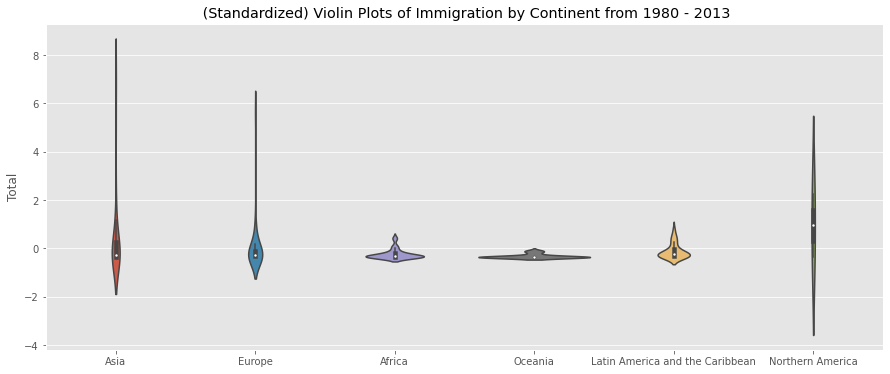

In [57]:
plt.figure(figsize=(15,6))
sns.violinplot(x="Continent", y="Total", data=df_standard)
plt.xlabel("")
plt.title(" (Standardized) Violin Plots of Immigration by Continent from 1980 - 2013")

plt.show()


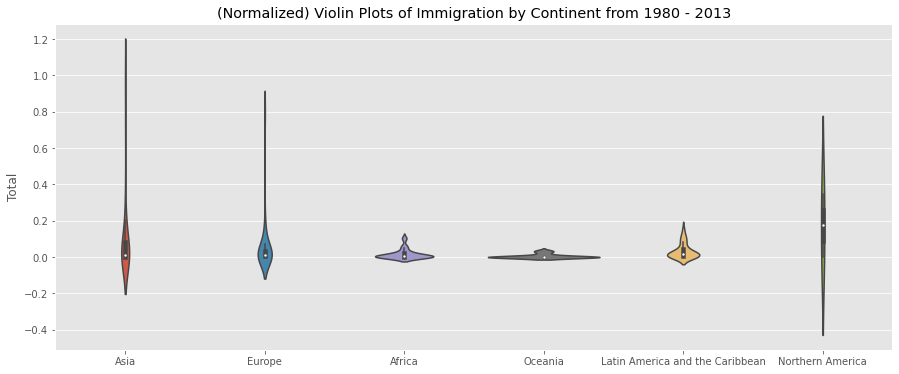

In [58]:
plt.figure(figsize=(15,6))
sns.violinplot(x="Continent", y="Total", data=df_norm)
plt.xlabel("")
plt.title("(Normalized) Violin Plots of Immigration by Continent from 1980 - 2013")

plt.show()

### Density Curves of Immigrants by Continent (subplots)

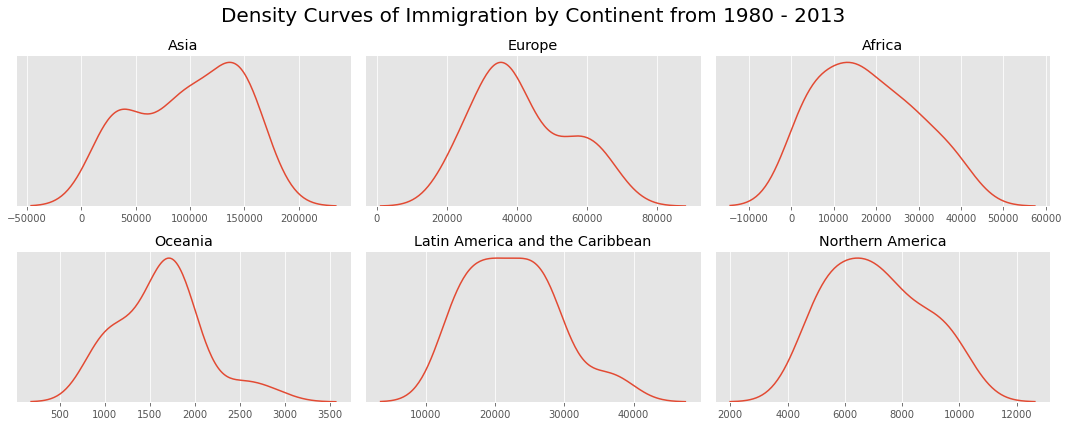

In [20]:
r, c = 2, 3
plt.figure(figsize=(15,6))
for i, continent in enumerate(df['Continent'].unique()):
    # print(continent)
    plt.subplot(r,c,i+1)
    df_continent = df.loc[df['Continent'] == continent, years].transpose()
    df_continent['Total'] = df_continent.sum(axis=1)
    sns.kdeplot(x=df_continent['Total'])
    plt.xlabel("")
    plt.title(continent)
    plt.ylabel("")
    plt.yticks([])

plt.suptitle("Density Curves of Immigration by Continent from 1980 - 2013", fontsize=20)
plt.tight_layout()
plt.show()

Here we can clearly see the distribution of immigrants in each Continent, we can observe the shape of the distribution and determine the skew and whether they are normally distrubute or how close to normal they are.


Compare the distribution of the number of new immigrants from China and India for the period 1980 - 2013.

In [59]:
# get the dataset
df_CP = df.loc[['China', 'India'], years].transpose()
df_CP.head(3)

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147


In [60]:
df_CP.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


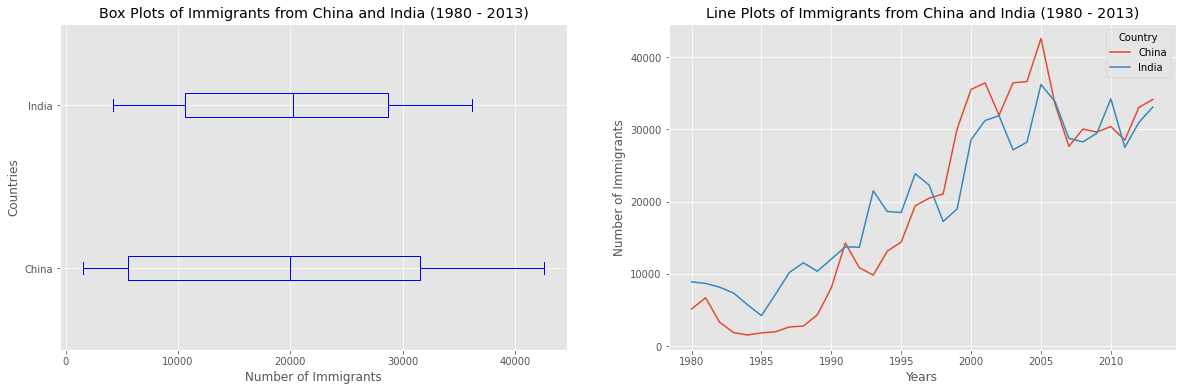

In [63]:
fig = plt.figure(figsize=(15,6)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CP.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CP.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

It can be deduced that while both countries have similar median immigrant populations approx 20,000, China's population range is more spread out. The max population from India for any year (36,120) is around 15% lower than the maximum population from China (42,584).

The similar median is further reinforced by the line plot where we can see a similar trend by both countries as there is a gradual increase of immigrants over the years.


Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [25]:
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15.head(3)

,Type,Continent,iso_alpha,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Asia,IND,Southern Asia,Developing regions,8880,8670,8147,7338,5704,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Asia,CHN,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Europe,GBR,Northern Europe,Developed regions,22045,24796,20620,10015,10170,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500


In [26]:
year_80s = list(map(str, range(1980, 1990))) 
year_90s = list(map(str, range(1990, 2000))) 
year_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, year_80s].sum(axis=1) 
df_90s = df_top15.loc[:, year_90s].sum(axis=1) 
df_00s = df_top15.loc[:, year_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

new_df.head(3)

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413


In [27]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


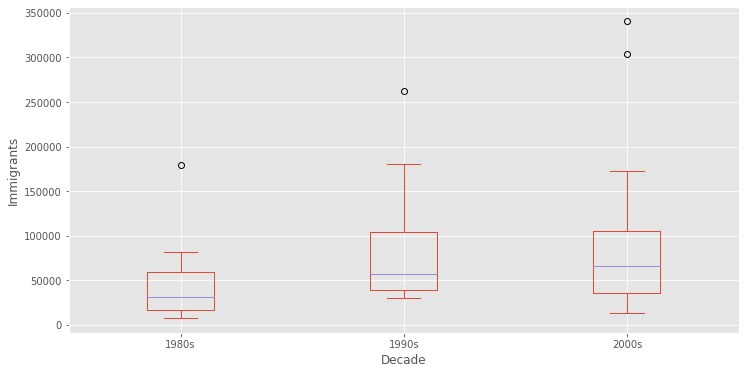

In [28]:
new_df.plot(kind='box', figsize=(12, 6))
plt.xlabel("Decade")
plt.ylabel("Immigrants")
plt.show()

The first signficant observation is that the box plots differ from the summary stats - this is because box plots identify outliers. In order for a data point to be classified as an outlier one of the following must be true:

- larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
- smaller than Q1 by at least 1.5 times the IQR.

Using this we can detect outlier data points. If we look at the 2000s decade we end up with:

- Q1 (25%) = 36,101.5
- Q3 (75%) = 105,505.5
- IQR = Q3 - Q1 = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404)

Outlier > 209,611.5

In [65]:
# check how many entries fall within this threshold
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


Therefore for the decade 2000s, India and China are outliers

## Scatter Plot

Visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [29]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head(3)

,year,total
0,1980,99065
1,1981,110449
2,1982,104169


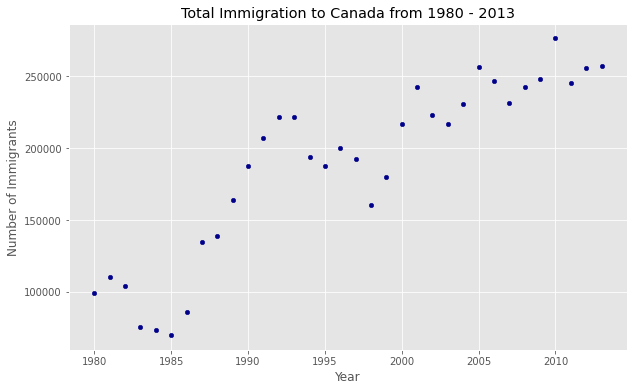

In [30]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We can clearly see an upwards trend. Let's fit this behaviour with a regression line.

In [31]:
# obtain the y-intercept and gradient

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.54803529e+03, -1.08884008e+07])

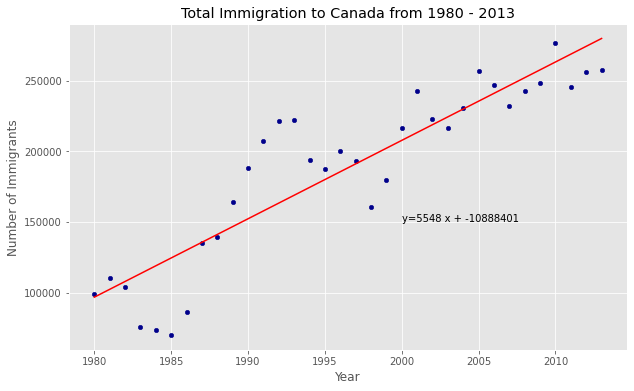

'No. Immigrants = 5548 * Year + -10888401'

In [32]:
# plot the line of best fit on the scatter plot with the equation
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

We can use this equation to predict immigrants for a given year assuming this behaviour is constant for the upcoming years.

## Bubble Plot

Analyze the effect of Argentina's great depression from 1998-2002 on immigration and its neighbor Brazil.

We visualise a bubble plot of Brazil and Argentina for the years 1980-2013. The weights of the bubbles will be set as the normalized value of the immigration population.

Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and bring it in the dataframe.

In [35]:
df_t = df[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t.head(3)

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia
0,1980,16,1,80,0,0,1,0,368,0,...,635,9378,128,0,0,103,1191,0,1,11
1,1981,39,0,67,1,0,3,0,426,0,...,832,10030,132,0,0,117,1829,0,2,17
2,1982,39,0,71,0,0,6,0,626,0,...,621,9074,146,0,0,174,2162,0,1,11


In [36]:
# normalize Brazil data (min max scaling)
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

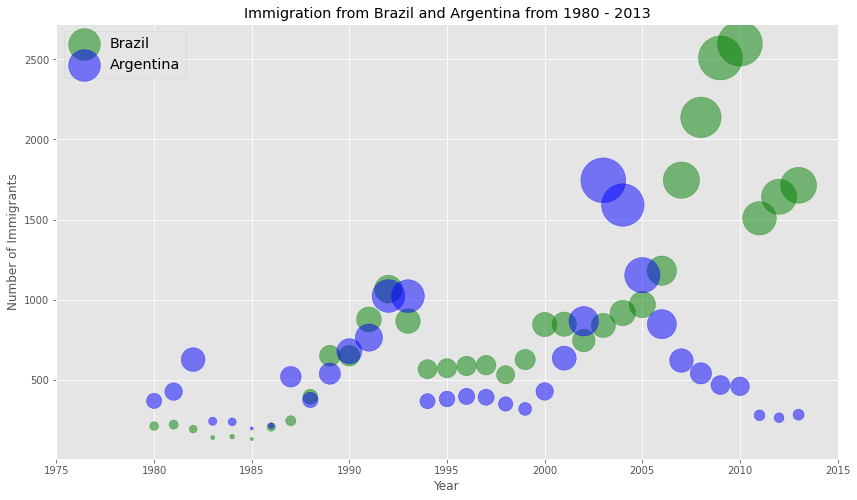

In [37]:
# Brazil
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Size of the bubble corresponds to the magnitude of the immigration population, larger the bubble, the more immigrants that year.

For the plot above, we can validate the increase in immigration during the great depression from 1998-2002. We can observe a similar spike around 1985 - 1993.

## Geospatial Visualization

In [38]:
df_map = df.reset_index()[['Continent', 'Country', 'Total', 'iso_alpha']]

df_map.head()

,Continent,Country,Total,iso_alpha
0,Asia,Afghanistan,58639,AFG
1,Europe,Albania,15699,ALB
2,Africa,Algeria,69439,DZA
3,Oceania,American Samoa,6,ASM
4,Europe,Andorra,15,AND


In [39]:
fig = px.scatter_geo(df_map, locations="iso_alpha",
                     color="Continent", # which column to use to set the color of markers
                     hover_name="Country", # column added to hover information
                     size="Total", # size of markers
                     projection="natural earth")
fig.show()